# Biblioteche

In [75]:
import pandas as pd

dfLBR = pd.read_csv("csv" + "/" + "biblioteche.csv", sep = "\t")

# Posti a sedere

In [ ]:
import pandas as pd

dfSTS = pd.read_csv("csv" + "/" + "posti_a_sedere.csv", sep = "\t")

# Presenze

In [17]:
import pandas as pd

df = pd.read_excel("riepilogo" + "/" + "Monitoraggio presenze in sala di lettura da luglio 2020.xlsx",
    sheet_name = "2021")

# Intervallo

In [32]:
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

dfGRN = pd.DataFrame(columns = ["Giorno"])        

start_date = date(2021, 1, 1)

end_date = date(2021, 4, 26)

for single_date in daterange(start_date, end_date):
    dfGRN = dfGRN.append({"Giorno":single_date.strftime("%Y-%m-%d")},
        ignore_index = True) 

# Anno, mese, giorno, settimana

In [19]:
def giorno(giorno):
    if type(giorno) != float:
        giorni_del_mese = [ x for x in range(31, 0, -1)]
        for giorno_del_mese in giorni_del_mese:
            if giorno.find(str(giorno_del_mese)) != -1:
                return giorno_del_mese
    return 0

def mese(giorno):
    if type(giorno) != float:
        giorno = giorno.lower()
        if giorno.find("gennaio") != -1:
            return 1
        elif giorno.find("febbraio") != -1:
            return 2
        elif giorno.find("marzo") != -1:
            return 3
        elif giorno.find("aprile") != -1:
            return 4
        elif giorno.find("maggio") != -1:
            return 5
        elif giorno.find("giugno") != -1:
            return 6
        if giorno.find("luglio") != -1:
            return 7
        elif giorno.find("agosto") != -1:
            return 8
        elif giorno.find("settemebre") != -1:
            return 9
        elif giorno.find("ottobre") != -1:
            return 10
        elif giorno.find("novembre") != -1:
            return 11
        elif giorno.find("dicembre") != -1:
            return 12
    return 0

def settimana(anno, mese, giorno):
    import datetime
    if mese != 0 and giorno != 0:
        return datetime.date(anno, mese, giorno).isocalendar()[1]

df["anno"] = 2021

df["giorno"] = df.apply(lambda x: giorno(x["\xa0.1"]), axis = 1)

df["mese"] = df.apply(lambda x: mese(x["\xa0.1"]), axis = 1)

df["settimana"] = df.apply(lambda x: settimana(x["anno"], x["mese"], x["giorno"]),
    axis = 1)

In [20]:
df.replace("chiuso", 0, inplace = True)

df.replace("chiuso ", 0, inplace = True)

df.replace("chiuso\xa0", 0, inplace = True)

df.replace("chiuso\xa0 ", 0, inplace = True) 

df.replace("Chiuso", 0, inplace = True)

df.replace("In SottoCrociera", 0, inplace = True)

In [21]:
df.fillna(0, inplace = True)

for index, row in df.iterrows():
    
    if row["giorno"] == 0:
        df.loc[index, "giorno"] = giorno  
    else:
        giorno = row["giorno"]
    
    if row["mese"] == 0:
        df.loc[index, "mese"] = settimana  
    else:
        mese = row["mese"]    
    
    if row["settimana"] == 0:
        df.loc[index, "settimana"] = settimana  
    else:
        settimana = row["settimana"]

# Riepiloghi

In [42]:
def sigla(biblioteca):
    if biblioteca == "Biblioteca BICF":
        return "BICF"
    elif biblioteca == "Biblioteca del Polo Centrale di Medicina e Chirurgia":
        return "Medicina"
    elif biblioteca == "Biblioteca del Polo di Mediazione Interculturale":
        return "Mediazione"
    elif biblioteca == "Biblioteca di Scienze agrarie\xa0":
        return "Agraria"
    elif biblioteca == "Biblioteca Biomedica Città-Studi":
        return "Biomedica"
    elif biblioteca == "Biblioteca di Filosofia":
        return "Filosofia"
    elif biblioteca == "Biblioteca di Medicina Veterinaria":
        return "Veterinaria"
    elif biblioteca == "Biblioteca di Scienze dell’Antichità e Filologia Moderna":
        return "SAFM"
    elif biblioteca == "Biblioteca di Scienze della Storia e della Documentazione Storica":
        return "Storia"
    elif biblioteca == "Biblioteca di Scienze della Terra “A. Desio”":
        return "Scienze della Terra"
    elif biblioteca == "Biblioteca di Scienze Politiche “Enrica Collotti Pischel”":
        return "Scienze politiche"
    elif biblioteca == "Biblioteca di Storia dell’Arte della Musica e dello Spettacolo":
        return "Arte"
    elif biblioteca == "Biblioteca di Studi Giuridici e Umanistici":
        return "BSGU"
    elif biblioteca == "Biblioteca Matematica":
        return "Matematica"
    elif biblioteca == "Biblioteca di Lingue Straniere":
        return "Lingue"
    elif biblioteca == "Biblioteca Malliani":
        return "Malliani" 
    return ""

def posti_a_sedere(biblioteca):
    for index, row in dfSTS.iterrows():
        if row["sigla"] == biblioteca:
            return row["posti_a_sedere"]
    return 0

for colonna in list(df.columns.values):
    biblioteca = sigla(colonna)
    if biblioteca != "":
        with open("csv" + "/" + biblioteca + "_20210101_20210425.csv", "w") as fh:
            fh.write("Giorno" + "\t")
# fh.write("Biblioteca" + "\t")
            fh.write("Posti" + "\t")
            fh.write("Orario" + "\t")
            fh.write("09.00-12.00" + "\t")
            fh.write("12.00-14.00" + "\t")
            fh.write("14.00-16.00" + "\t")
            fh.write("16.00-18.00" + "\t")
            fh.write("Picco" + "\t")
            fh.write("Note" + "\n")
            for index, row in df.iterrows():
                if row["\xa0"] == "9.00-12.00":
                    fh.write(str(row["anno"]) + "-" + "{:02d}".format(row["mese"]) + "-" + "{:02d}".format(row["giorno"]) + "\t")
# fh.write(biblioteca + "\t")
                    fh.write(str(posti_a_sedere(biblioteca)) + "\t")
                    fh.write("00.00-00.00" + "\t")
                    fh.write(str(row[colonna]) + "\t")
                elif row["\xa0"] == "12.00-14.00":
                    fh.write(str(row[colonna]) + "\t")
                elif row["\xa0"] == "14.00-16.00":
                    fh.write(str(row[colonna]) + "\t")
                elif row["\xa0"] == "16.00-18.00":
                    fh.write(str(row[colonna]) + "\t")
                else:
                    fh.write(str(row[colonna]) + "\t")
                    fh.write("" + "\n")
        
        dfTMP00 = pd.read_csv("csv" + "/" + biblioteca + "_20210101_20210425.csv",
            sep = "\t")
        
        dfTMP01 = dfGRN.merge(dfTMP00, on = "Giorno", how = "left")
        
        dfTMP01.fillna({"Posti": 0, "Orario": "00.00-00.00", "09.00-12.00": 0,
            "12.00-14.00": 0, "14.00-16.00": 0, "16.00-18.00": 0, "Picco": 0},
            inplace = True)
        
        dfTMP01.to_csv("csv" + "/" + biblioteca + "_20210101_20210425.csv",
            sep = "\t", decimal = ",", header = False, index = False)

# Verifica

In [76]:
biblioteca = "BSGU"

In [79]:
import pandas as pd

def presenze(value1, value2, value3, value4, value5):
    return max(value1, value2, value3, value4, value5)

def posti_disponibili(posti_a_sedere, presenze):
    return posti_a_sedere -presenze


df = pd.read_excel("riepiloghi" + "/" + biblioteca + "2021.xlsx")

df["Presenze"] = df.apply(lambda x: presenze(x["09.00-12.00"],
    x["12.00-14.00"], x["14.00-16.00"], x["16.00-18.00"], x["Picco"]), axis = 1)

df["Posti disponibili"] = df.apply(lambda x: posti_disponibili(x["Posti"],
    x["Presenze"]), axis = 1)


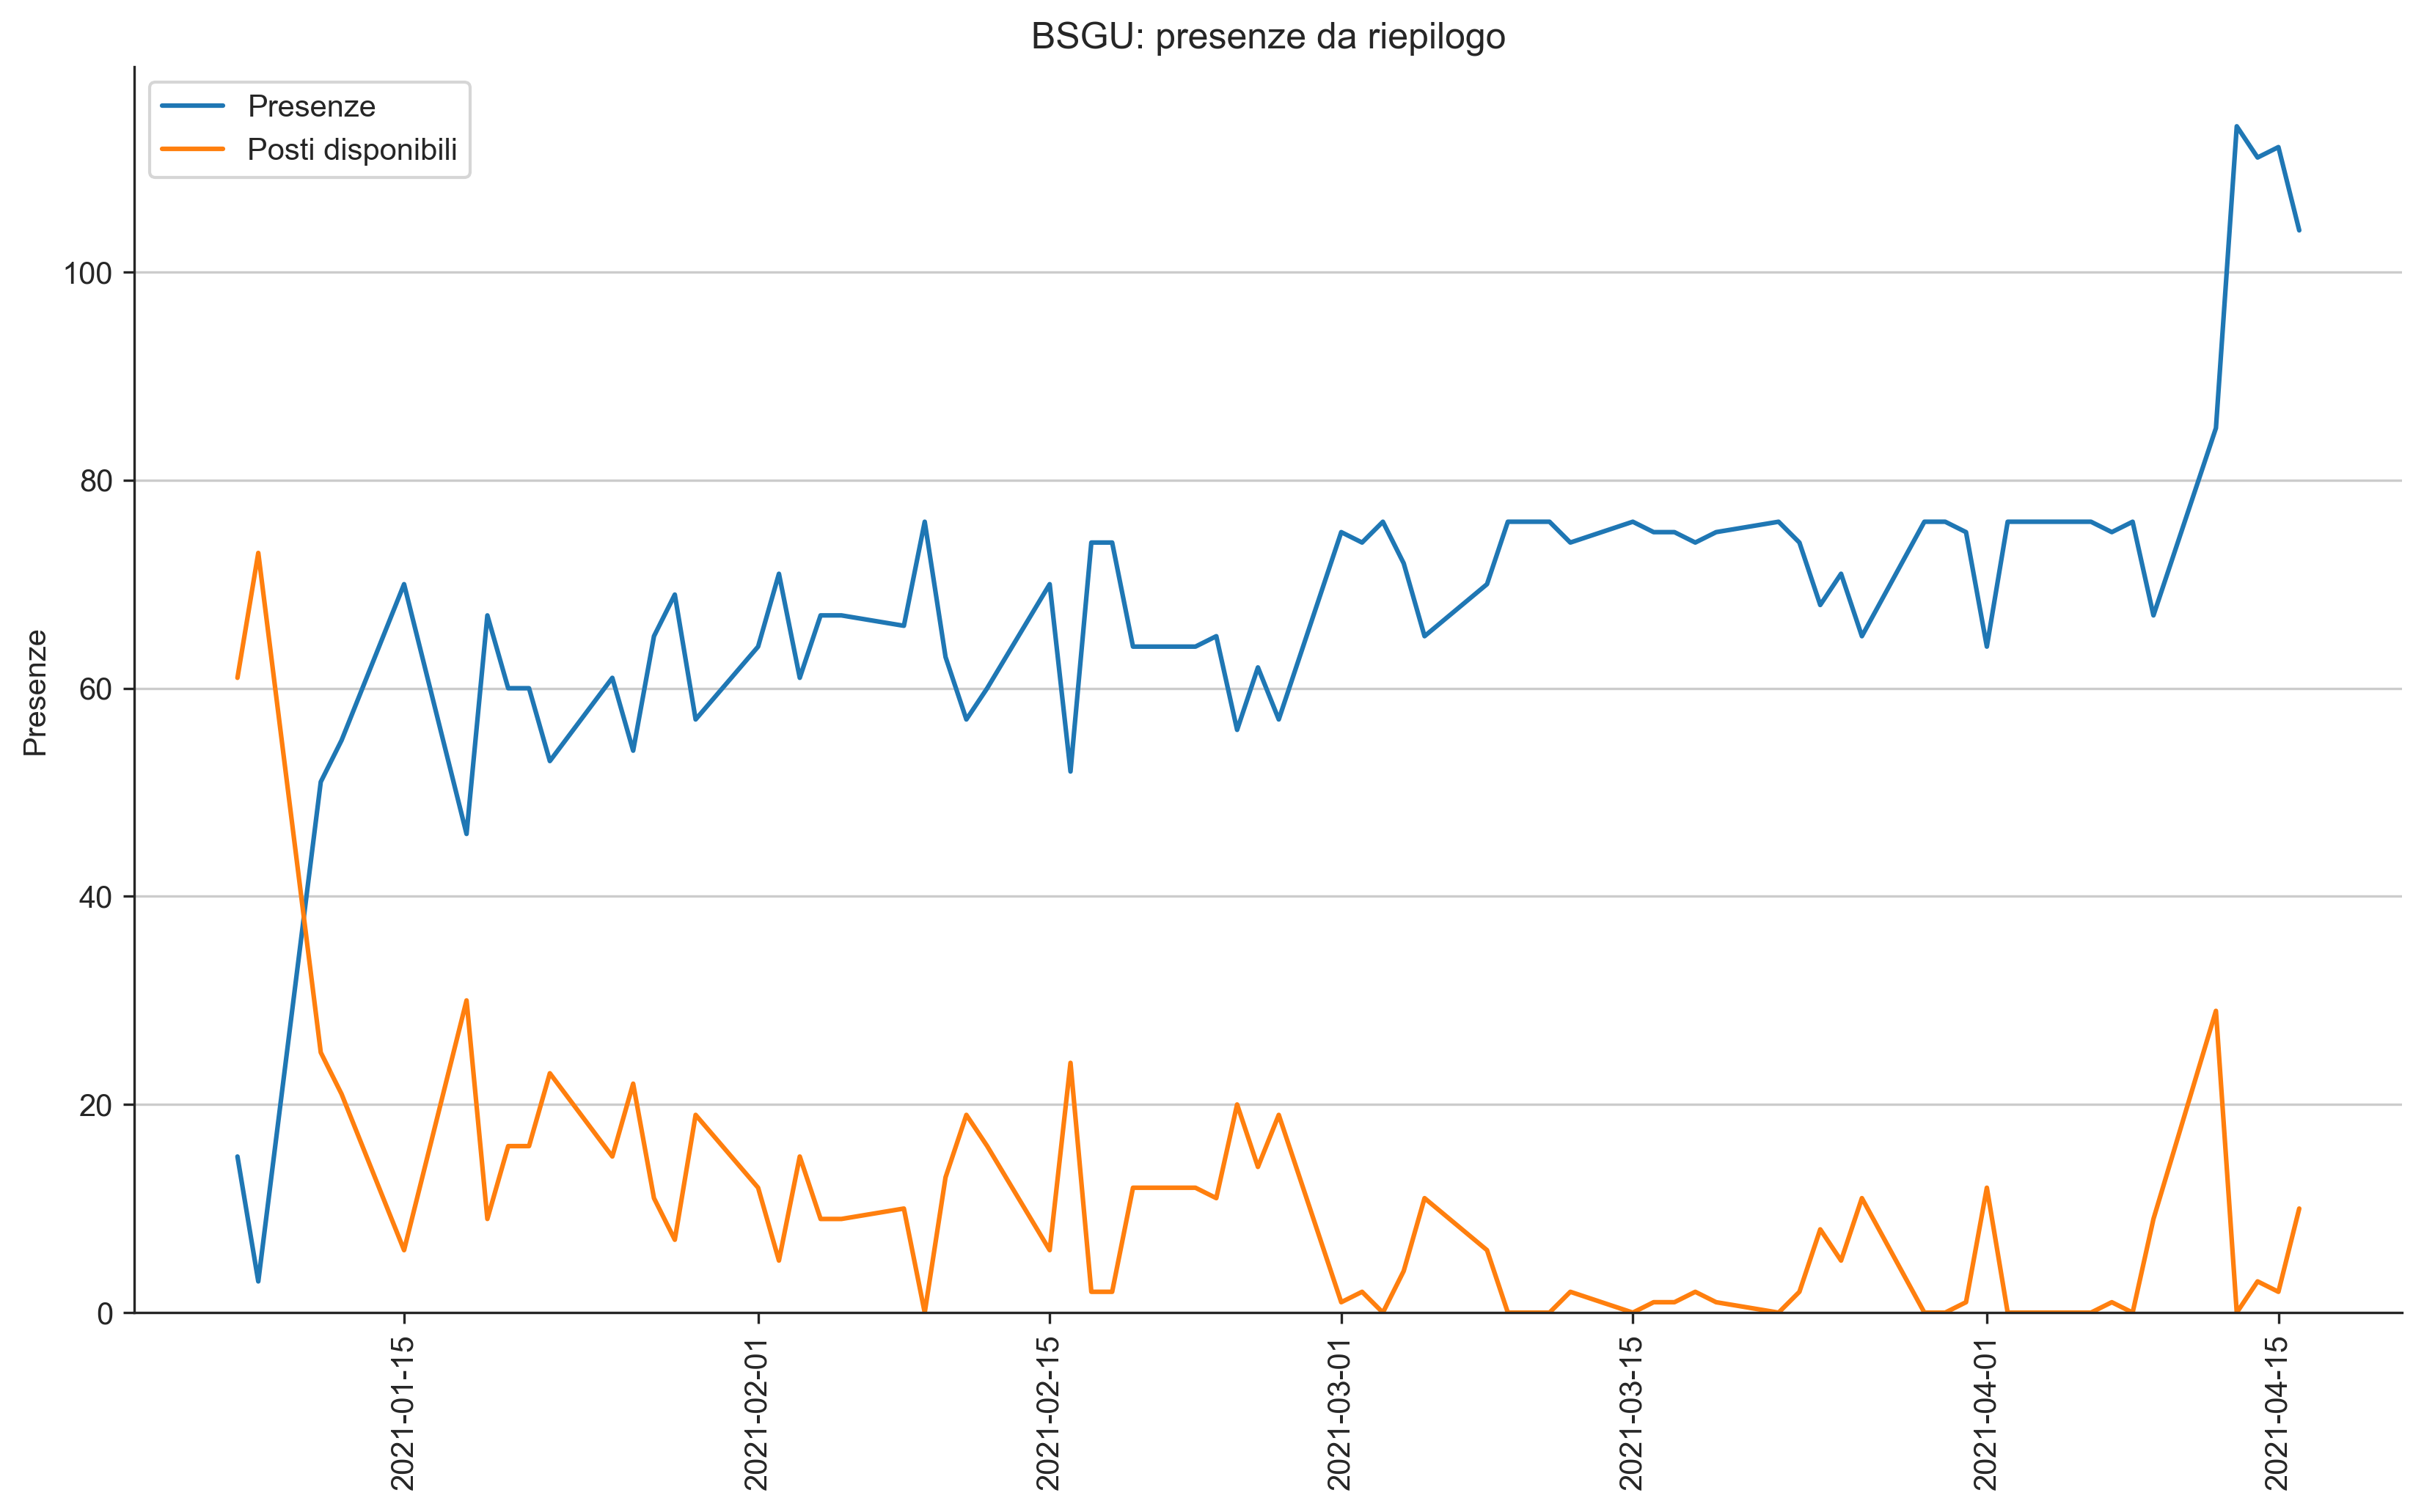

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (13.3, 7.5), dpi = 300)
sns.set_style("ticks")
plt.title(biblioteca + ": presenze da riepilogo")
sns.lineplot(data = df[df["Presenze"] != 0],
    x = "Giorno", y = "Presenze", label = "Presenze")
sns.lineplot(data = df[df["Presenze"] != 0],
    x = "Giorno", y = "Posti disponibili", label = "Posti disponibili")

sns.despine(right = True)
plt.grid(b = None, which = "both", axis = "y")
plt.ylim(0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.ylabel("Presenze")
plt.show()